In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score


# For reproducibility
np.random.seed(1000)

nb_samples = 500

In [3]:
def show_dataset(X, Y):
    fig, ax = plt.subplots(1, 1, figsize=(30, 25))

    ax.grid()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    for i in range(nb_samples):
        if Y[i] == 0:
            ax.scatter(X[i, 0], X[i, 1], marker='o', color='r')
        else:
            ax.scatter(X[i, 0], X[i, 1], marker='^', color='b')

    plt.show()

# Linear SVC

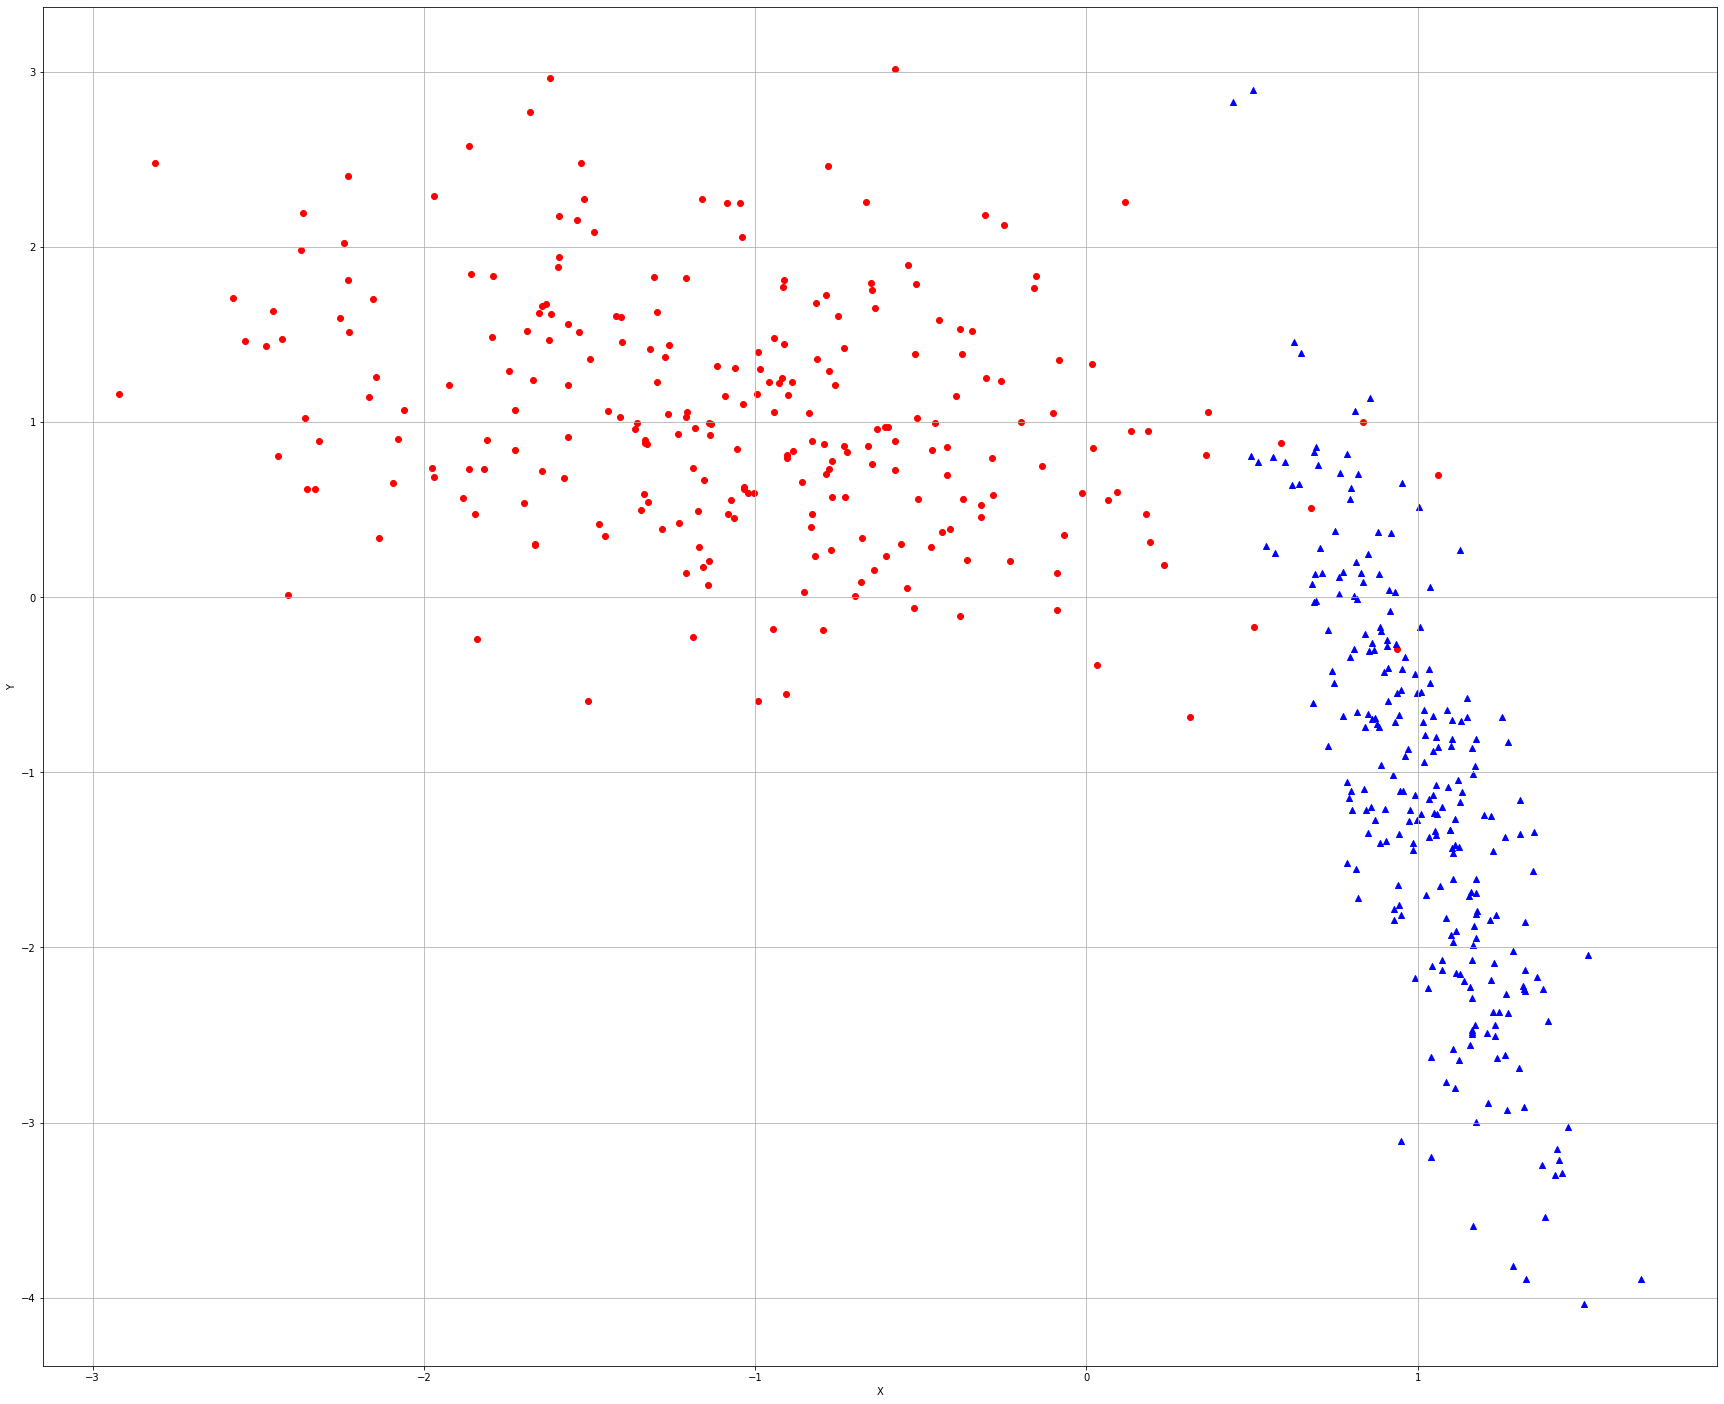

Linear SVM CV average score: 0.984


In [4]:
# Create dataset
X, Y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0,
                               n_clusters_per_class=1)

# Show dataset
show_dataset(X, Y)

# Create a SVM with linear kernel
svc = SVC(kernel='linear')

# Compute CV score
svc_scores = cross_val_score(svc, X, Y, scoring='accuracy', cv=10)
print('Linear SVM CV average score: %.3f' % svc_scores.mean())

After training a model, it's possible to get an array of support vectors, through the instance variable called support_vectors_

[[ 0.17999466  0.47710135]
 [ 0.18528553  0.94609098]
 [ 0.93667963 -0.29569562]
 [ 0.11643842  2.25808127]
 [ 0.09349105  0.59990266]
 [ 0.36107616  0.80955712]
 [ 1.06179325  0.69822906]
 [ 0.23310792  0.18209322]
 [ 0.58641142  0.88042054]
 [ 0.36573167  1.05861145]
 [ 0.83564945  1.00291639]
 [ 0.50682445 -0.17145271]
 [ 0.13376883  0.95072896]
 [ 0.06505292  0.55319729]
 [ 0.67649151  0.5087089 ]
 [ 0.3130449  -0.6828621 ]
 [ 0.19058043  0.31357983]
 [ 0.50218464  2.89562455]
 [ 0.44238368  2.82666344]
 [ 0.51894938  0.77109203]
 [ 0.68322177 -0.60335017]
 [ 0.64083602  0.64680694]
 [ 0.49573291  0.80787939]
 [ 0.57044696  0.25056255]
 [ 0.56325769  0.80123829]
 [ 0.61976999  0.64207812]
 [ 0.7870398  -1.51726441]
 [ 0.68050943  0.07312757]
 [ 0.69280965 -0.01941908]
 [ 0.68990906  0.13392928]
 [ 0.68699735 -0.02625405]
 [ 0.54246622  0.29390729]
 [ 0.60059069  0.77390689]
 [ 0.73008055 -0.84708882]
 [ 0.62714254  1.45509098]]


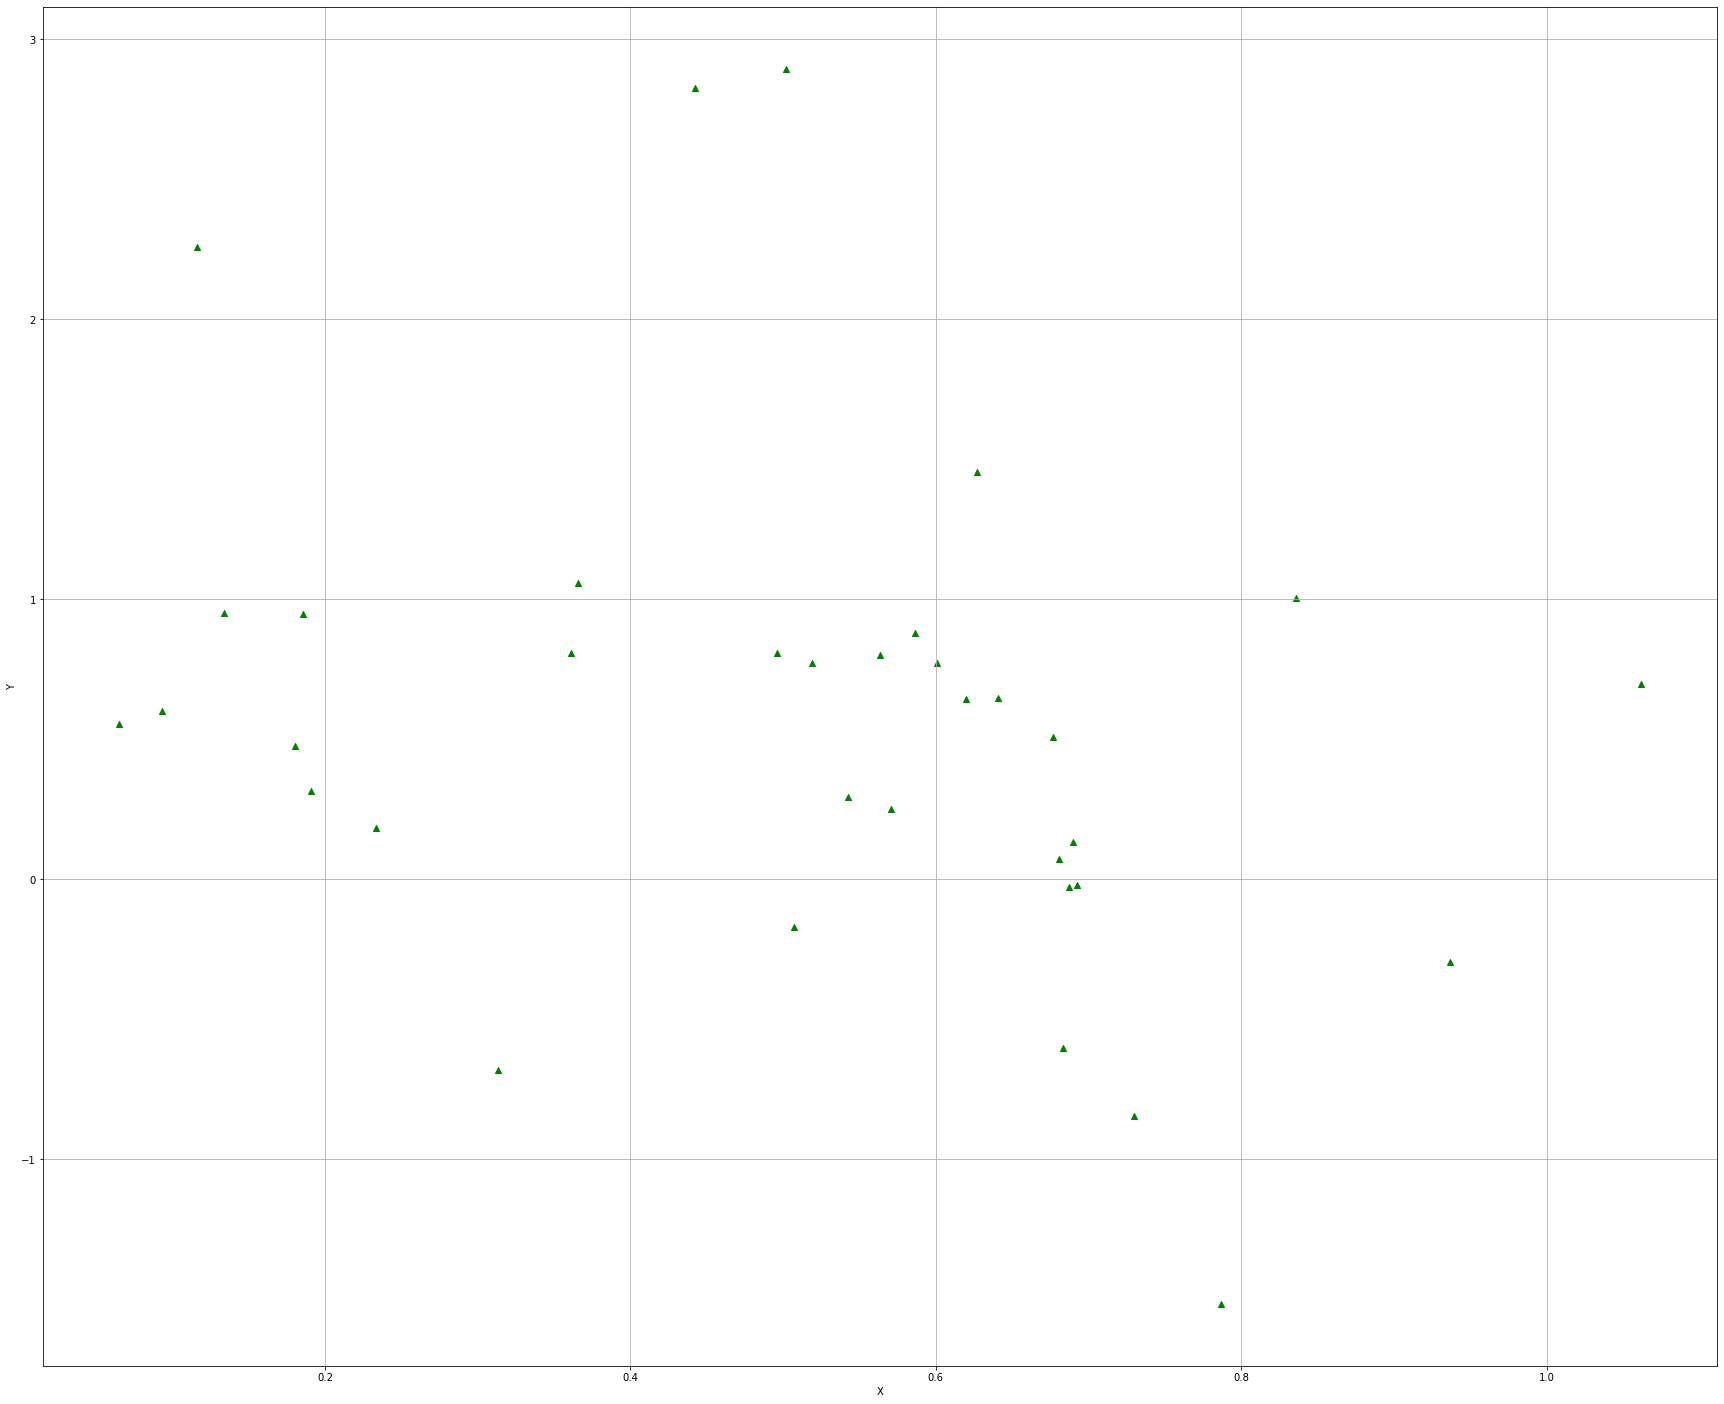

In [5]:
svc.fit(X,Y)
print(svc.support_vectors_)
fig, ax = plt.subplots(1, 1, figsize=(30, 25))
ax.grid()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], marker='^', color='g')

Looking at the range, it can be seen that the support vectors corresponds to the overlapping zone. 

# Kernel-based classification

When working with non-linear problems, it's useful to transform the original vectors by projecting them into a higher dimensional space where they can be linearly separated. 

In [6]:
import multiprocessing

from sklearn.datasets import make_circles
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [7]:
# For reproducibility
np.random.seed(1000)

nb_samples = 500

## On circles 

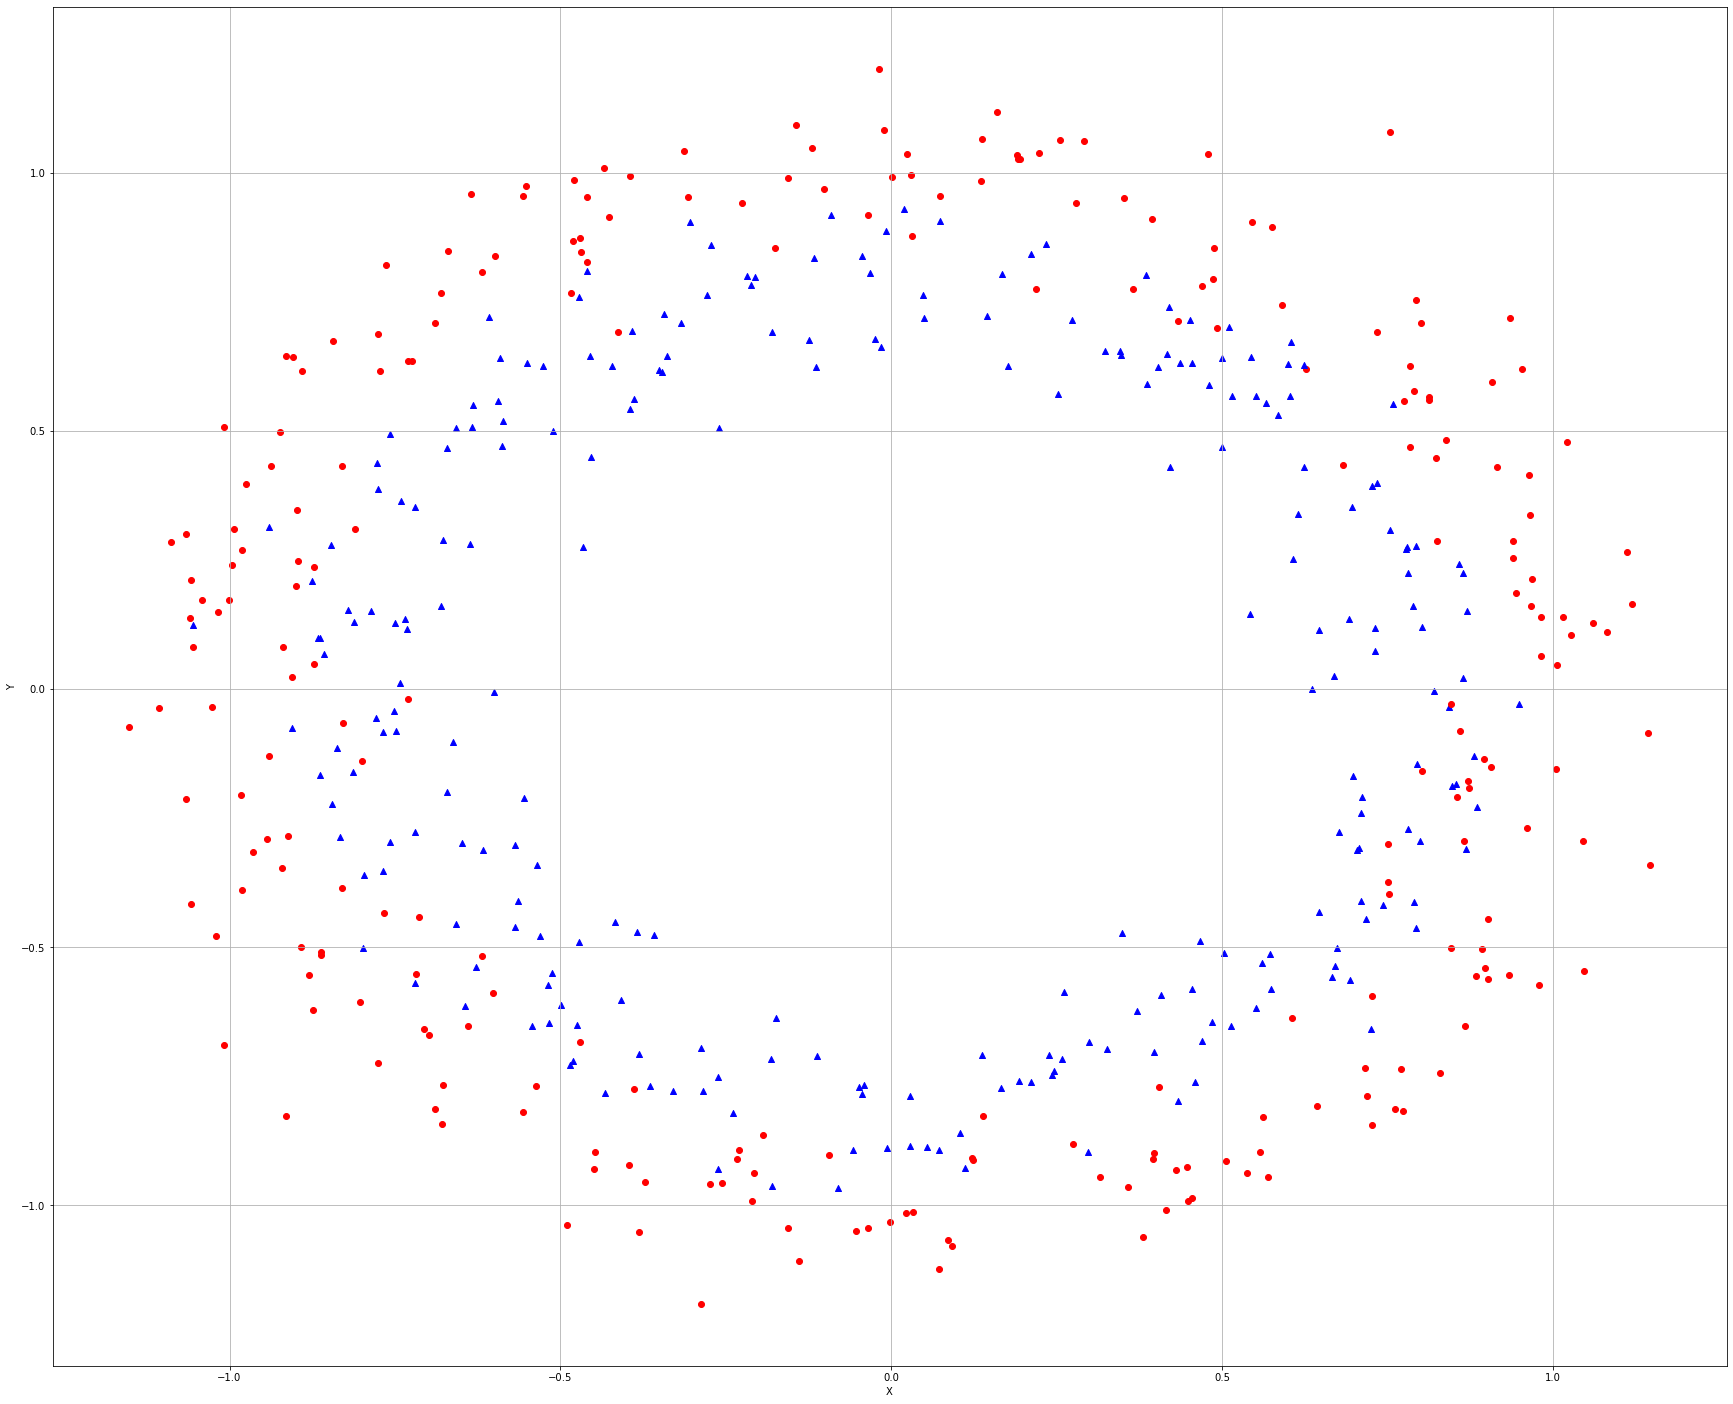

In [8]:
# Create datasets
X, Y = make_circles(n_samples=nb_samples, noise=0.1)

# Show dataset
show_dataset(X, Y)

# Define a param grid
param_grid = [
    {
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0]
    }
]

Let's see how linear classifier performs.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
lr_score = cross_val_score(lr, X, Y, scoring = 'accuracy', cv = 10)
print(lr_score.mean())

0.45


In [14]:
# Create a train grid search on SVM classifier
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,
                    scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())
gs.fit(X, Y)

print(gs.best_estimator_)
print(gs.best_estimator_.get_params())
print('Kernel SVM score: %.3f' % gs.best_score_)

SVC(C=1.5)
{'C': 1.5, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Kernel SVM score: 0.880


As expected from the geometry of our dataset, the best kernel is a radial basis function. 

## On MNIST digits

In [16]:
from sklearn.datasets import load_digits
# Load dataset
digits = load_digits()

In [17]:
param_grid = [ 
    {
        'kernel':['linear','poly','rbf','sigmoid'],
        'C':[0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0]
    }
]

gs = GridSearchCV(estimator=SVC(), param_grid = param_grid, scoring= 'accuracy', cv=10, n_jobs = multiprocessing.cpu_count())
gs.fit(digits.data, digits.target)
print(gs.best_estimator_)
print(gs.best_estimator_.get_params())
print('Kernel SVM score: %.3f' % gs.best_score_)

SVC(C=3.0)
{'C': 3.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Kernel SVM score: 0.981


## On Olivetti faces dataset

In [20]:
from sklearn.datasets import fetch_olivetti_faces
olivetti_home = '/kaggle/temp/'
faces = fetch_olivetti_faces(data_home=olivetti_home)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /kaggle/temp/


dict_keys(['data', 'images', 'target', 'DESCR'])
AxesImage(54,36;334.8x217.44)


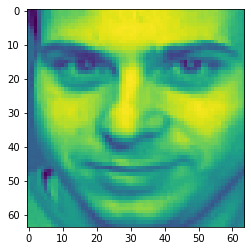

In [30]:
print(faces.keys())
print(plt.imshow(faces.images[85]))

In [31]:
# Define a param grid
param_grid = [
    {
        'kernel': ['rbf', 'poly'],
        'C': [0.1, 0.5, 1.0, 1.5],
        'degree': [2, 3, 4, 5],
        'gamma': [0.001, 0.01, 0.1, 0.5]
    }
]

# Create a train grid search on SVM classifier
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,
                    scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())
gs.fit(faces.data, faces.target)

print(gs.best_estimator_)
print('Kernel SVM score: %.3f' % gs.best_score_)

SVC(C=0.1, degree=2, gamma=0.01, kernel='poly')
Kernel SVM score: 0.977


How does it compare with multinomialNB and GaussianNB?

In [38]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
mnb = MultinomialNB()
gnb = GaussianNB()
mnb_scores = cross_val_score(mnb, digits.data, digits.target, scoring='accuracy', cv=10)
gnb_scores = cross_val_score(gnb, digits.data, digits.target, scoring='accuracy', cv=10)
print(mnb_scores.mean(), gnb_scores.mean())

0.8797858472998138 0.8113904407200497


Perform PCA:

In [82]:
from sklearn.decomposition import PCA
faces.images[0].shape
faces.data.shape

(400, 4096)

(400, 400)


<BarContainer object of 400 artists>

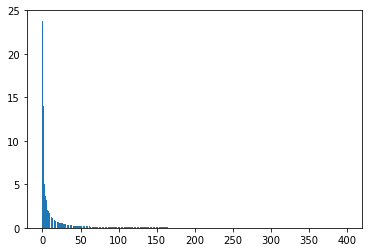

In [99]:
n_comp = 400
pca = PCA(n_components = n_comp, whiten = True)
X_pca = pca.fit_transform(faces.data/255)
print(X_pca.shape)
plt.bar(np.arange(n_comp), pca.explained_variance_ratio_ * 100.0)

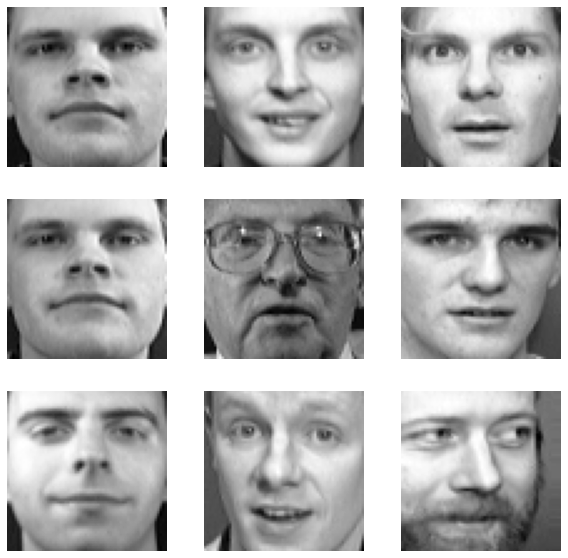

In [100]:
# Rebuild from PCA and show the result
fig, ax = plt.subplots(3, 3, figsize=(10, 10))

selection = np.random.randint(0, faces.data.shape[0], size=9)

samples = [pca.inverse_transform(X_pca[x]).reshape((64, 64)) for x in selection]

for i in range(3):
    for j in range(3):
        ax[i, j].set_axis_off()
        ax[i, j].imshow(samples[(i * 3) + j], cmap='gray')

plt.show()

With real datasets, SVM can extract a very large number of support
vectors to increase accuracy, and that can slow down the whole process. To allow finding out a trade-off between precision and number of support vectors, scikit-learn provides an implementation called NuSVC

In [53]:
from sklearn.svm import NuSVC

In [66]:
np.random.seed(10000)

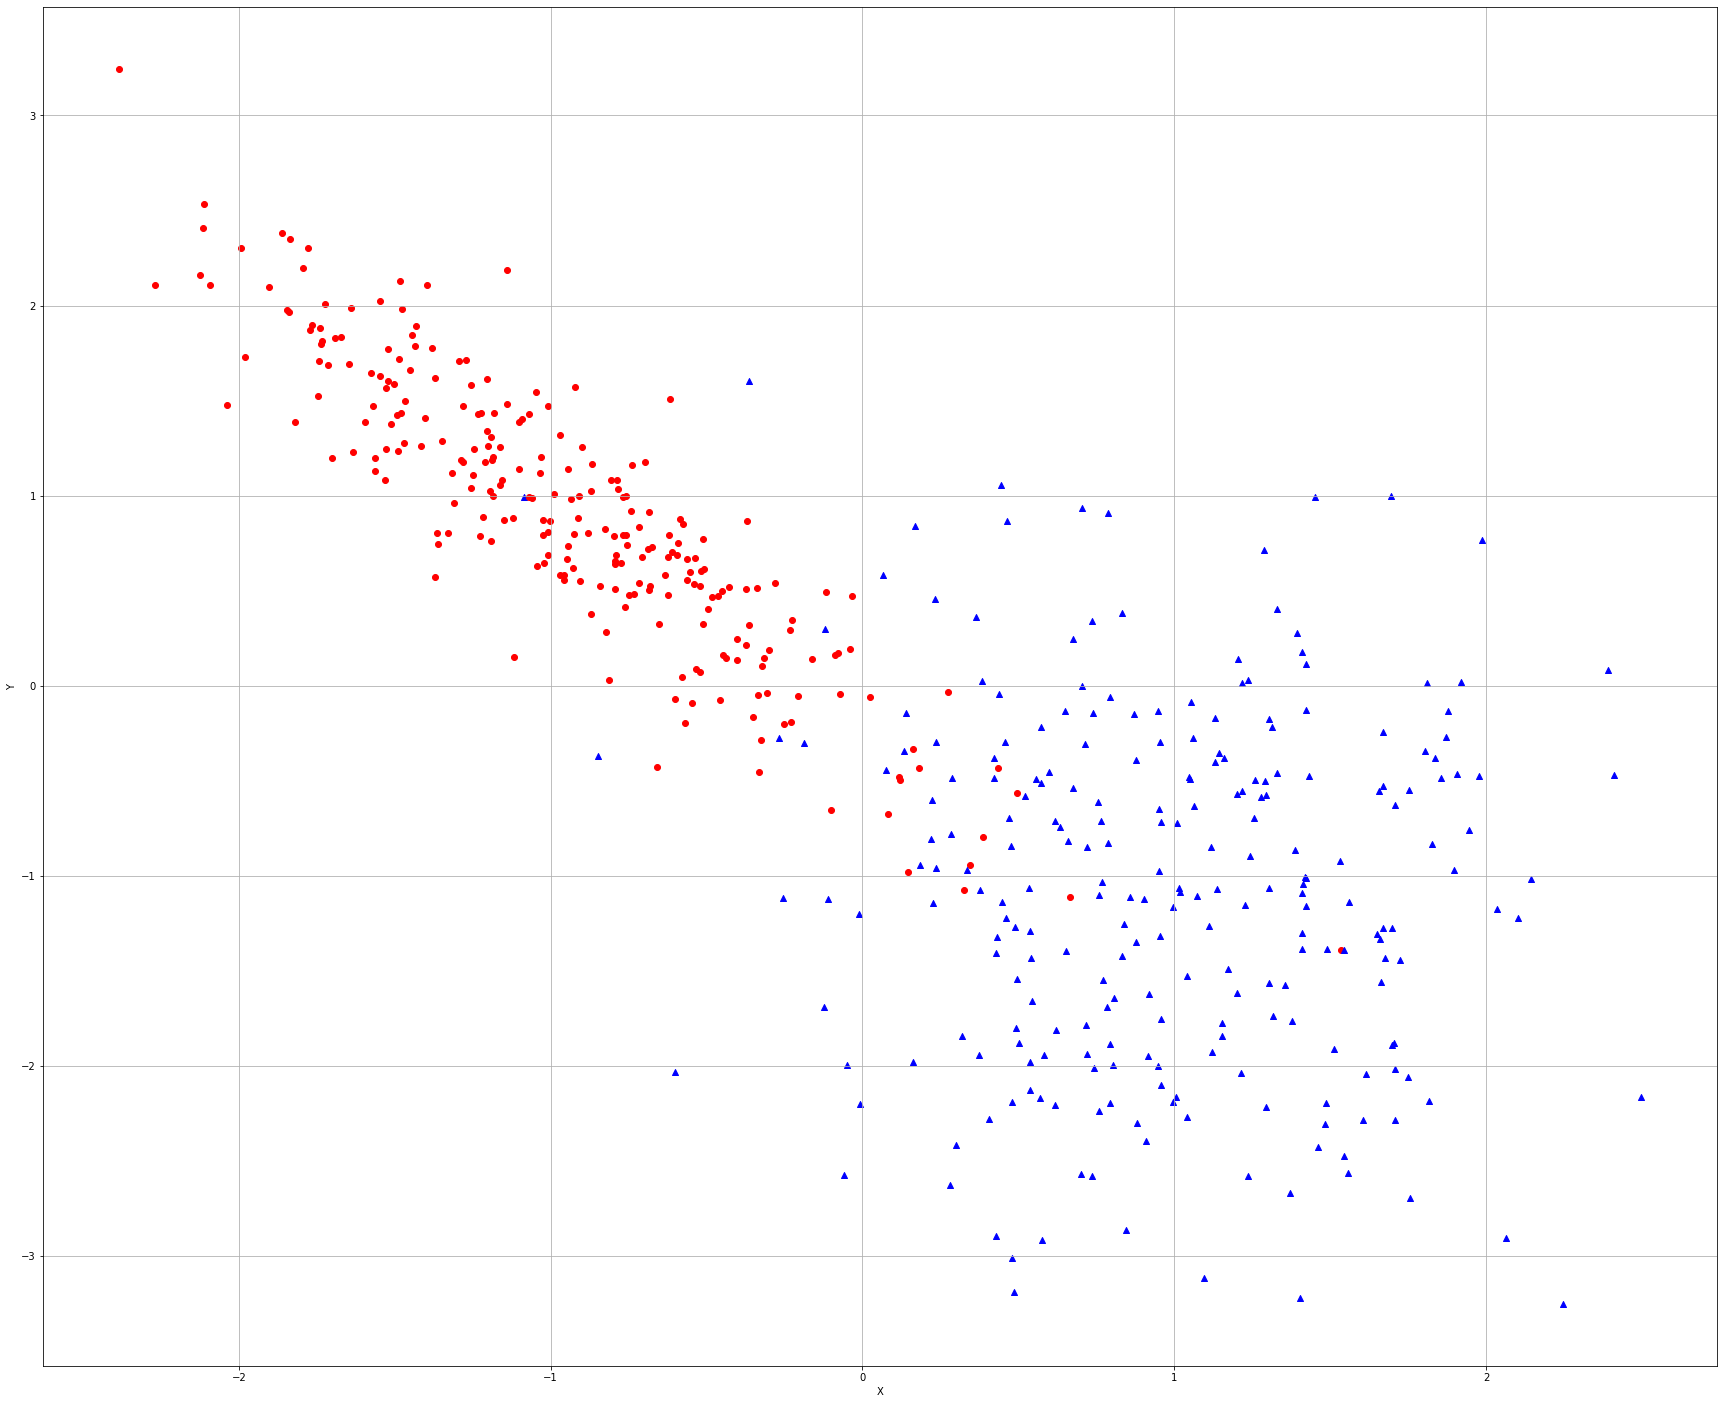

Number of support vectors: 73


In [71]:
# Create dataset
X, Y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0,
                               n_clusters_per_class=1)

# Show dataset
show_dataset(X, Y)

# Create and train a linear SVM
svc = SVC(kernel='linear')
svc.fit(X, Y)
print('Number of support vectors: %d' % len(svc.support_vectors_))

In [80]:
# Create and train a Nu-SVM classifier (nu = 0 the fewest, 1 the most)
nusvc = NuSVC(kernel='linear', nu=0.05)
nusvc.fit(X, Y)
print('Number of support vectors (nu=0.05): %d' % len(nusvc.support_vectors_))


Number of support vectors (nu=0.05): 28


In [81]:
from sklearn.model_selection import GridSearchCV
param_grid=[
                {'nu': [ 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 ,
                        0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]
                }
           ]
gs = GridSearchCV(estimator = NuSVC(kernel = 'linear'), param_grid = param_grid, scoring = 'accuracy', cv = 10)
gs.fit(X,Y)
print(gs.best_estimator_)
print(gs.best_score_)
print(len(gs.best_estimator_.support_vectors_))

NuSVC(kernel='linear', nu=0.15)
0.95
77


# Support Vector Regressor

In [101]:
from sklearn.svm import SVR

In [102]:
np.random.seed(1000)
nb_samples = 50

In [104]:
def show_dataset1(X, Y):
    fig, ax = plt.subplots(1, 1, figsize=(30, 25))

    ax.grid()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    ax.scatter(X, Y)

    plt.show()

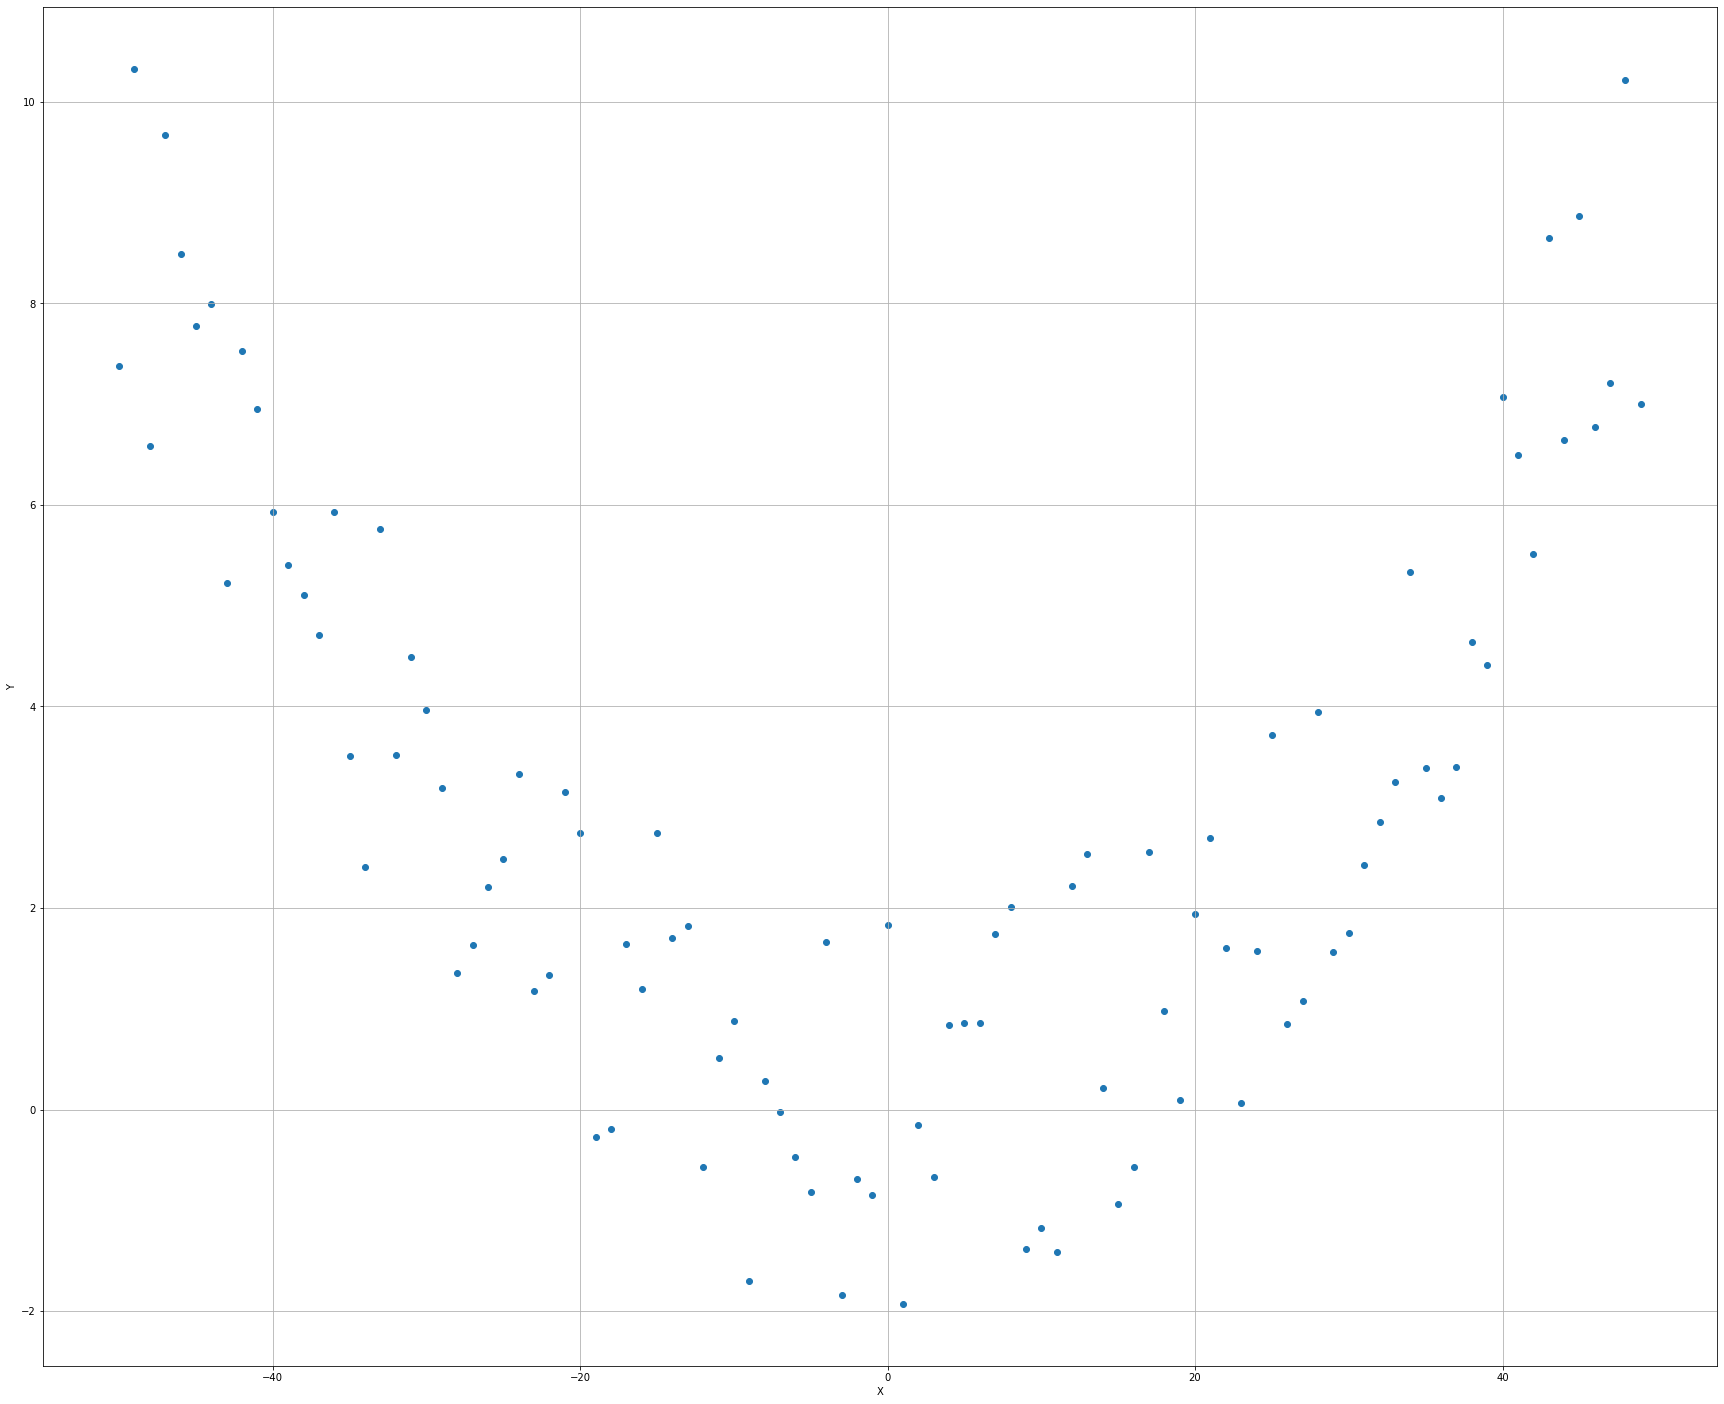

In [105]:
# Create dataset
X = np.arange(-nb_samples, nb_samples, 1)
Y = np.zeros(shape=(2 * nb_samples,))

for x in X:
    Y[int(x) + nb_samples] = np.power(x * 6, 2.0) / 1e4 + np.random.uniform(-2, 2)

# Show dataset
show_dataset1(X, Y)


In [106]:
# Create and train a Support Vector regressor
svr = SVR(kernel='poly', degree=2, C=1.5, epsilon=0.5)
svr_scores = cross_val_score(svr, X.reshape((nb_samples*2, 1)), Y, scoring='neg_mean_squared_error', cv=10)
print('SVR CV average negative squared error: %.3f' % svr_scores.mean())

SVR CV average negative squared error: -1.648
